In [1]:
from pathlib import Path

import plotnine as pn
import scanpy as sc
import partipy as pt

import pandas as pd
import decoupler as dc


figure_dir = Path("figures") / "fibroblast_cross_condition"
figure_dir.mkdir(exist_ok=True, parents=True)
sc.settings.figdir = figure_dir

output_dir = Path("output") / "fibroblast_cross_condition"
output_dir.mkdir(exist_ok=True, parents=True)

n_archetypes = 3
obsm_key = "X_pca_harmony"
obsm_dim = 16

color_dict = {
    "NF": "#01665E",  # teal (blue-green)
    "CM": "#8C510A",  # brown
}

adata = pt.read_h5ad("/home/pschaefer/fibroblast_cross_condition_partipy.h5ad")

msigdb_cache_path = output_dir / "msigdb_raw.pkl"
needs_cache_write = False
if msigdb_cache_path.exists():
    msigdb_raw = pd.read_pickle(msigdb_cache_path)
else:
    msigdb_raw = dc.op.resource("MSigDB")
    needs_cache_write = True

if msigdb_raw.duplicated(["geneset", "genesymbol"]).any():
    msigdb_raw = msigdb_raw[~msigdb_raw.duplicated(["geneset", "genesymbol"])].copy()
    needs_cache_write = True

if needs_cache_write:
    msigdb_raw.to_pickle(msigdb_cache_path)

/home/pschaefer/miniforge3/envs/partipy/lib/python3.11/site-packages/scanpy/_utils/__init__.py:35: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
/home/pschaefer/miniforge3/envs/partipy/lib/python3.11/site-packages/scanpy/__init__.py:24: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
/home/pschaefer/miniforge3/envs/partipy/lib/python3.11/site-packages/scanpy/readwrite.py:15: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.


/home/pschaefer/miniforge3/envs/partipy/lib/python3.11/site-packages/pydantic/main.py:464: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `dict[str, any]` - serialized value may not be as expected [field_name='optim_kwargs', input_value=(), input_type=tuple])


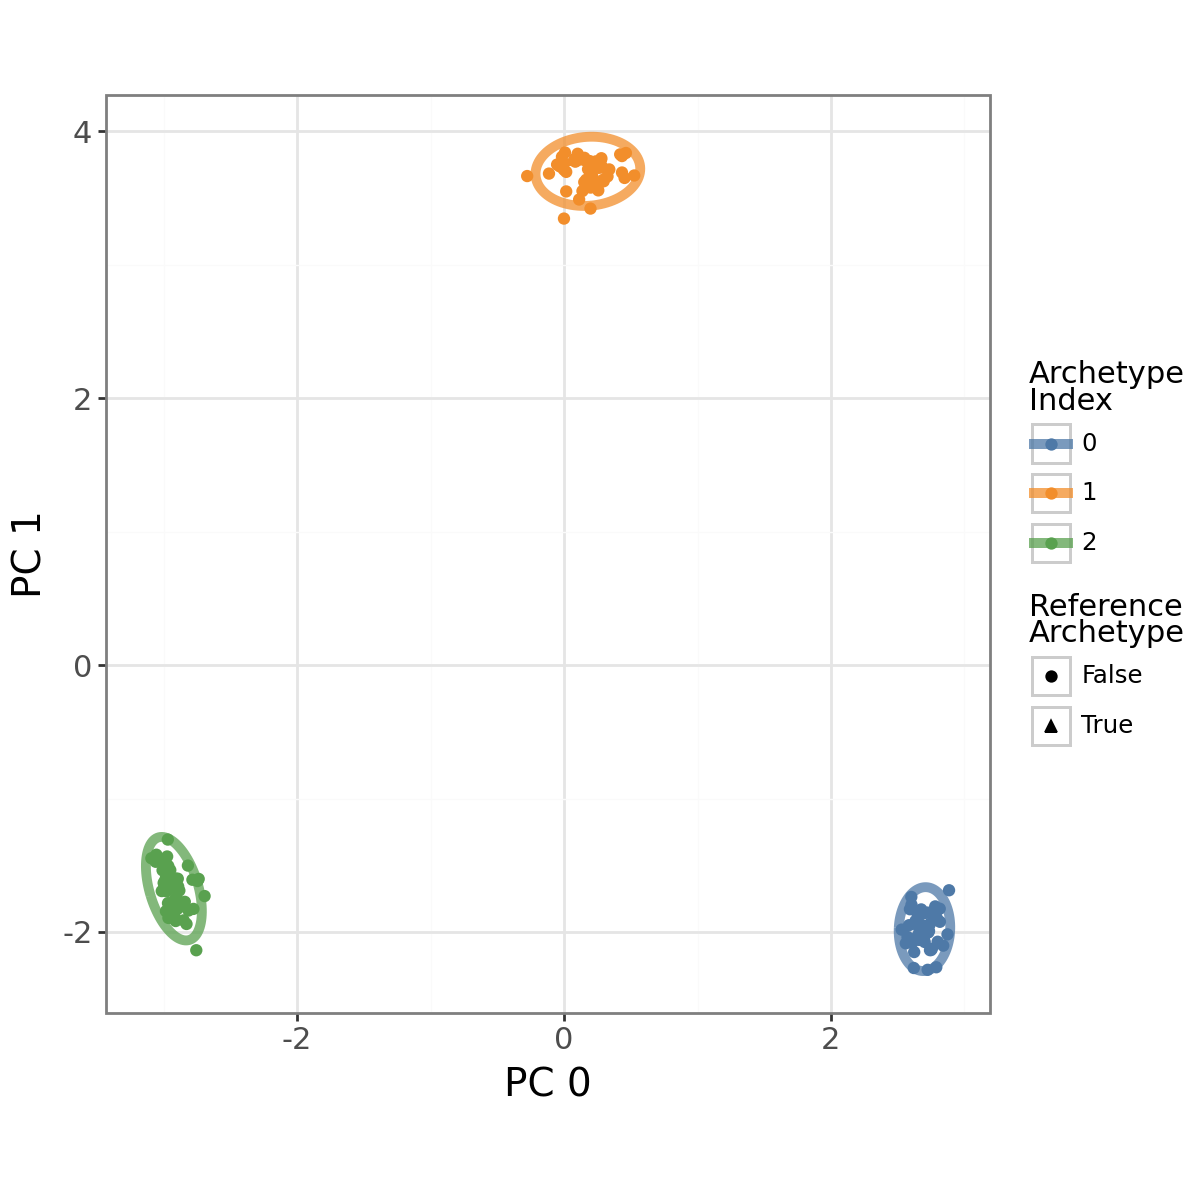

In [18]:
p = (
    pt.plot_bootstrap_2D(adata, result_filters={"n_archetypes": n_archetypes})
    + pn.theme_bw()
    + pn.theme(
        figure_size=(6, 6),
        axis_title_x=pn.element_text(size=14),
        axis_title_y=pn.element_text(size=14),
        axis_text_x=pn.element_text(size=11),
        axis_text_y=pn.element_text(size=11),
    )
    + pn.labs(x="PC 0", y="PC 1")
)
p.save(figure_dir / "plot_bootstrap_2D.pdf", verbose=False)
p.save(figure_dir / "plot_bootstrap_2D.png", verbose=False)
p.show()